In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymannkendall as mk

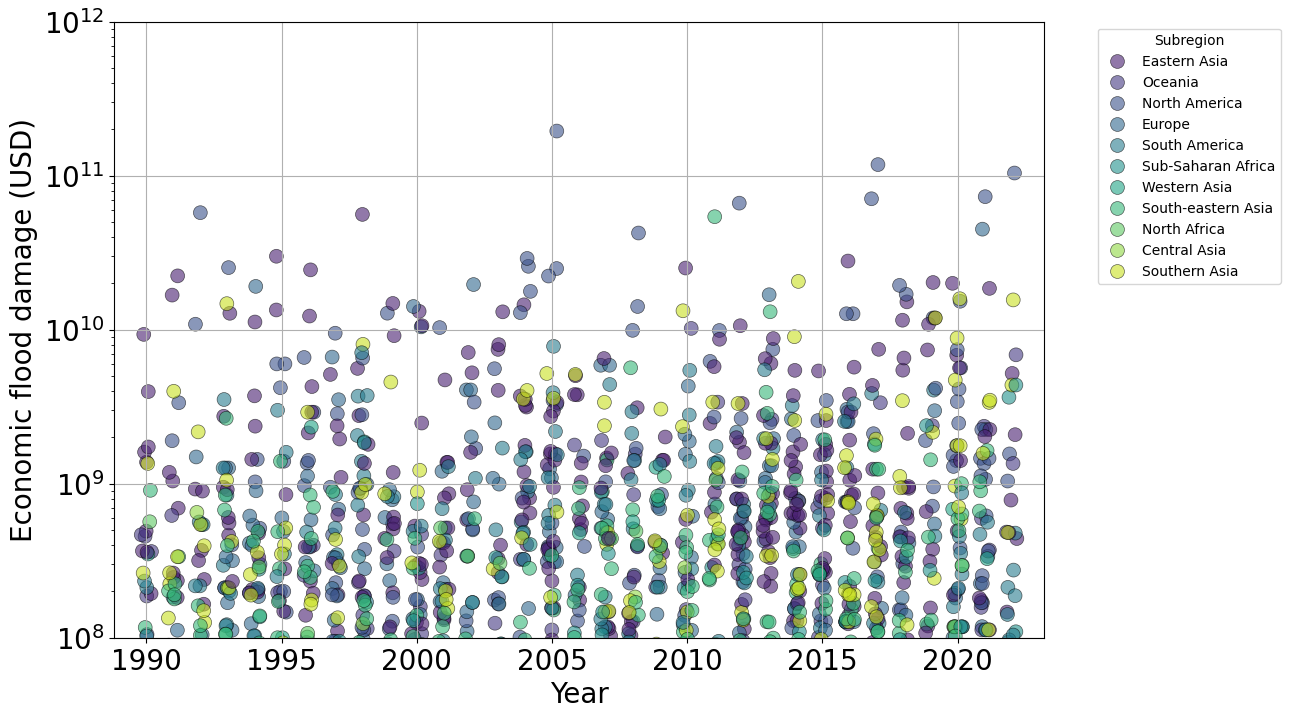

Subregion: Eastern Asia, P-value: 0.00021017740123929762, Trend: Increase
Subregion: Oceania, P-value: 0.0005060254100832662, Trend: Decrease
Subregion: North America, P-value: 0.17759172200172912, Trend: Increase
Subregion: Europe, P-value: 0.48066104621758665, Trend: Decrease
Subregion: South America, P-value: 0.6670725123924703, Trend: Decrease
Subregion: Sub-Saharan Africa, P-value: 0.5050399163258124, Trend: Decrease
Subregion: Western Asia, P-value: 0.6526832370013438, Trend: Decrease
Subregion: South-eastern Asia, P-value: 0.1548363541405009, Trend: Decrease
Subregion: North Africa, P-value: 0.8584007529637274, Trend: Increase
Subregion: Central Asia, P-value: 0.15582458786203346, Trend: Decrease
Subregion: Southern Asia, P-value: 0.006152876844328636, Trend: Increase


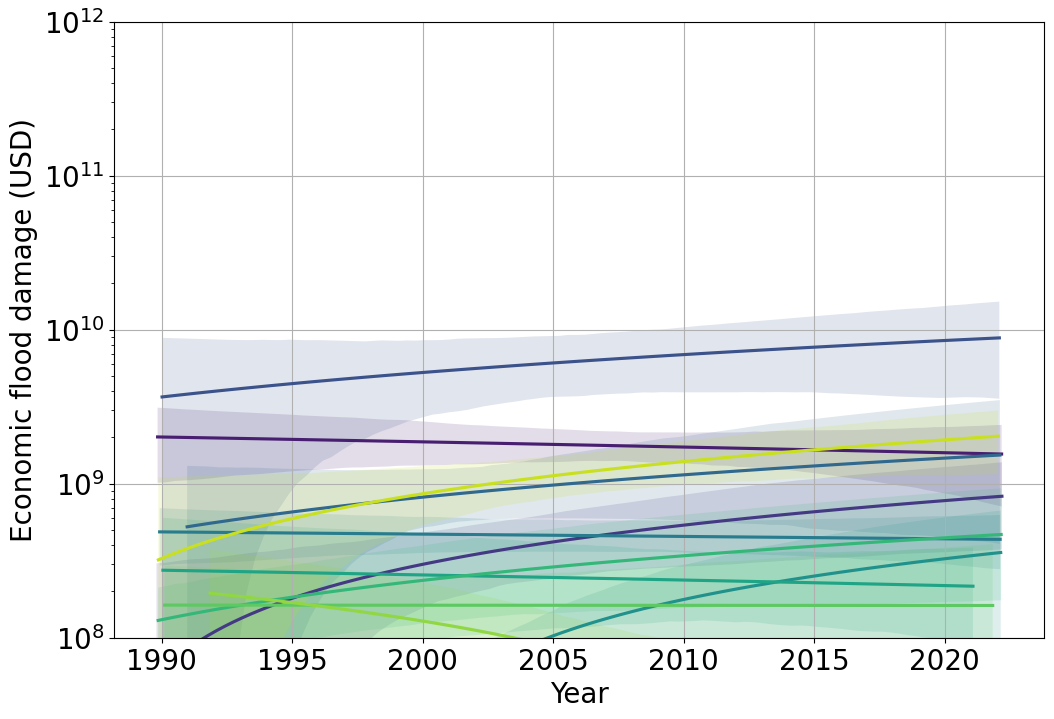

In [2]:
# Load the datasets
df1 = pd.read_csv('HIC_income_damage_per_country_1990_2022.csv')
df2 = pd.read_csv('UPMIC_income_damage_per_country_1990_2022.csv')
df3 = pd.read_csv('LMIC_income_damage_per_country_1990_2022.csv')
df4 = pd.read_csv('LIC_income_damage_per_country_1990_2022.csv')

# Concatenate the dataframes
df = pd.concat([df1, df2, df3, df4])

#df = pd.read_csv('Income_damage_per_country_1990_2022.csv')


# Multiply the values in the specified column by 1000
df['Total Damage, Adjusted (\'000 US$)'] *= 1000

# Add jitter to the x-axis
df['Start Year'] += np.random.uniform(-0.2, 0.2, size=len(df))  # Add jitter

# Create the scatter plot
plt.figure(figsize=(12, 8))  # Increased size
palette = sns.color_palette('viridis', n_colors=len(df['Subregion'].unique()))  # Create a palette

# Plotting the scatter points with black edges
sns.scatterplot(data=df, 
                 x='Start Year', 
                 y='Total Damage, Adjusted (\'000 US$)',  # Corrected column name
                 hue='Subregion', 
                 palette=palette,  # Use the created palette
                 alpha=0.6,  
                 s=100,  # Increased marker size
                 edgecolor='black',  # Black edge color
                 linewidth=0.5)

# Add titles and labels
plt.xticks(fontsize=20)  # Increased font size for x-ticks
plt.yticks(fontsize=20) 
plt.grid(True)  
plt.xlabel('Year', fontsize=20)  # Set label font size
plt.ylabel('Economic flood damage (USD)', fontsize=20)  # Set label font size
plt.legend(title='Subregion', bbox_to_anchor=(1.05, 1), loc='best')

# Adjust y-axis limits and scale
plt.yscale('log')  # Use logarithmic scale
plt.ylim(1e8, 1e12)  # Adjust limits based on your data

# Adjust x-axis limits
plt.xlim(df['Start Year'].min() - 1, df['Start Year'].max() + 1)  # Adjust limits
plt.savefig('Figure_3_1.png', bbox_inches='tight')

# Show the scatter plot
plt.show()

# Mann-Kendall Test for each subregion and plot trend lines
plt.figure(figsize=(12, 8))  # Create a new figure for trend lines
for subregion in df['Subregion'].unique():
    sub_df = df[df['Subregion'] == subregion]
    trend_result = mk.original_test(sub_df['Total Damage, Adjusted (\'000 US$)'])  # Corrected column name
    
    # Determine if the trend is increasing or decreasing
    trend_direction = "Increase" if trend_result.slope > 0 else "Decrease"

    # Print the p-value and trend direction for each subregion
    print(f'Subregion: {subregion}, P-value: {trend_result.p}, Trend: {trend_direction}')

    # Plotting the trend line for each subregion with the same palette
    sns.regplot(x='Start Year', 
                y='Total Damage, Adjusted (\'000 US$)',  # Corrected column name
                data=sub_df, 
                scatter=False,  # No scatter points on this plot
                line_kws={'color': palette[df['Subregion'].unique().tolist().index(subregion)], 'label': 'Trend Line'})
    
plt.xlabel('Year', fontsize=20)  # Set label font size
plt.ylabel('Economic flood damage (USD)', fontsize=20)  # Set label font size
plt.xticks(fontsize=20)  # Increased font size for x-ticks
plt.yticks(fontsize=20) 
plt.yscale('log')  # Use logarithmic scale
plt.ylim(1e8, 1e12)  # Adjust limits based on your data
plt.grid(True)
plt.savefig('Figure_3.png', bbox_inches='tight')
plt.show()  # Show the trend plot


/scratch/slurm_tmpdir/job_1506080/ipykernel_1564464/887146819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/scratch/slurm_tmpdir/job_1506080/ipykernel_1564464/887146819.py:5: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/scratch/slurm_tmpdir/job_1506080/ipykernel_1564464/887146819.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


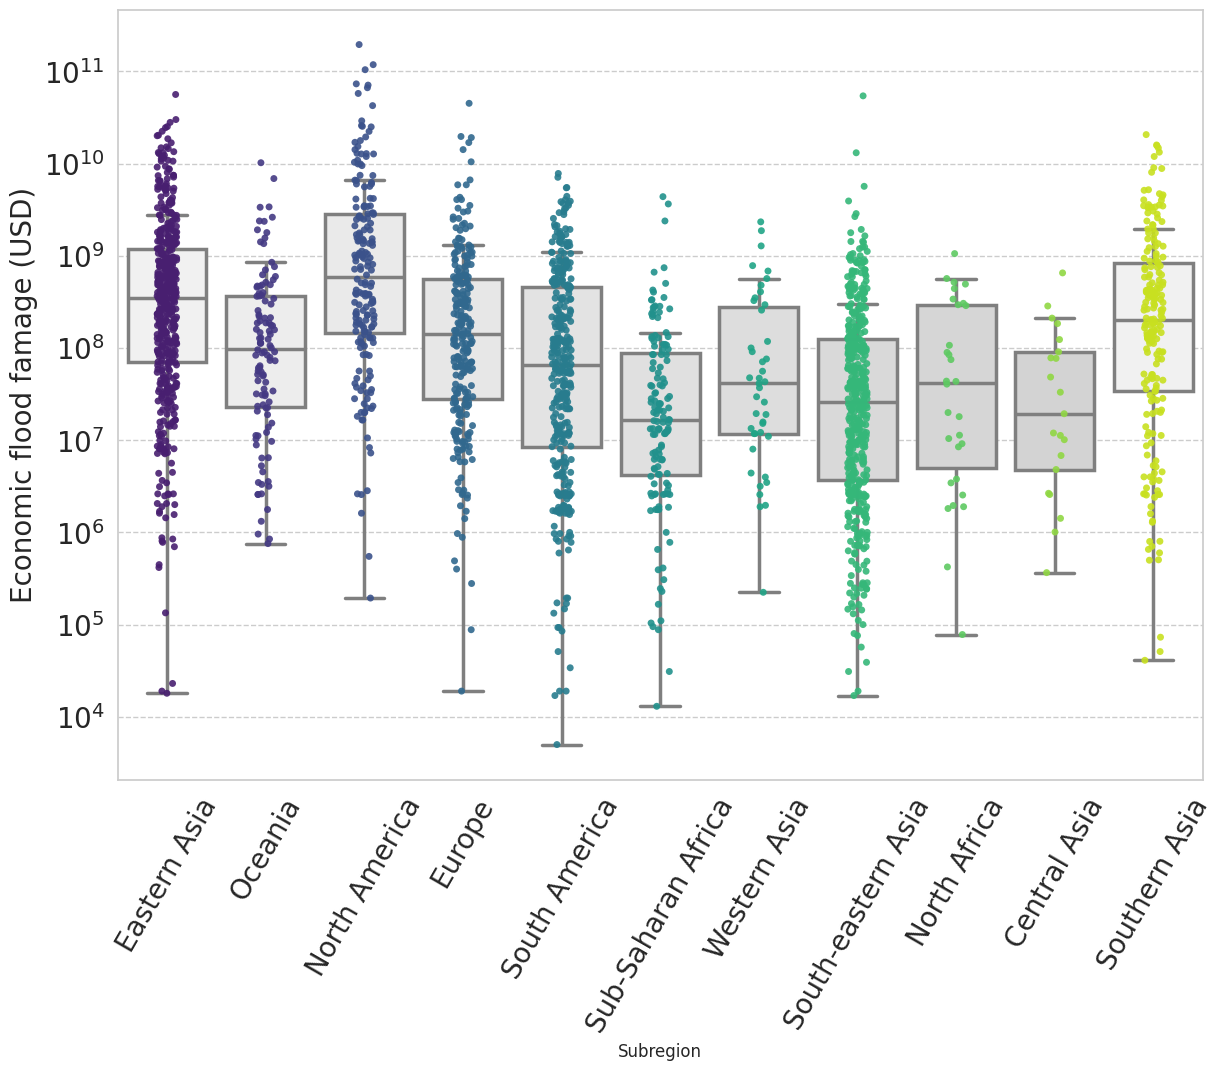

In [3]:
sns.set_theme(style="whitegrid")  # White background with gridlines
plt.figure(figsize=(14, 10))  # Set figure size
palette = sns.light_palette("lightgrey", n_colors=10)
# Box plot with black borders and white fill
sns.boxplot(
    data=df, 
    x='Subregion', 
    y='Total Damage, Adjusted (\'000 US$)',
    color='white',  # White fill for the boxes
    linewidth=2.5,  # Black borders with thicker lines
    fliersize=0,
    palette=palette
    #boxprops=dict(edgecolor='black')
    # Remove outlier markers (optional, as scatter points will overlay)
)

# Overlay scatter points on the box plot
sns.stripplot(
    data=df, 
    x='Subregion', 
    y='Total Damage, Adjusted (\'000 US$)',  # Scatter points in black
    alpha=0.9,  # Transparency for scatter points
    jitter=True,  # Add jitter to avoid overlapping points
    size=5,
    palette='viridis'# Size of scatter points
)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add titles and labels
plt.ylabel('Economic flood famage (USD)', fontsize=20)
plt.xticks(fontsize=20, rotation=60)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=20)

# Add gridlines for y-axis only
plt.grid(axis='y', linestyle='--', alpha=1)

# Save the plot
plt.savefig('Figure_3_BoxPlot_Scatter.png', bbox_inches='tight', dpi=300)  # High resolution for publication

# Show the plot
plt.show()